# Esercitazione 9 - Risoluzione del problema del commesso viaggiatore con un algoritmo genetico

## 1 Obiettivo

L'obiettivo di questa esercitazione è la realizzazione di un programma che permetta di risolvere il problema del commesso viaggiatore utilizzando un algoritmo genetico.

Nella risoluzione del problema viene studiata l'ampia scelta di parametri che caratterizza questa tipologia di algoritmi e le conseguenze che comportano determinate scelte.

## 2 Il problema del commesso viaggiatore

Si immagini di avere N città in posizioni $\vec x_i$. Il problema consiste nel determinare il più breve percorso che permetta di visitare una e una sola volta ciascuna città ritornando poi a quella di partenza.

## 3 Algoritmi genetici

Un algoritmo genetico è una tecnica di ottimizzazione che sfrutta i concetti di evoluzione e selezione naturale.

L'unità fondamentale di questo algoritmo è l'_individuo_, costituito da una specifica proposta di soluzione del problema in esame codificata in una qualche struttura di dati su cui sia poi possibile eseguire le operazioni descritte successivamente e che costituisce il _genoma_ dell'individuo.

Ciascuna iterazione dell'algoritmo è chiamata _generazione_ ed è caratterizzata da una specifica _popolazione_ di individui. La generazione iniziale può essere generata casualmente o essere fissata in fase di codifica. Nel corso di una generazione vengono innazitutto eseguite, con probabilità fissate, mutazioni sul _genoma_ di varia natura.
Viene quindi eseguita la selezione degli individui. Questa può essere eseguita in diversi modi, l'idea fondamentale da riprodurre è che gli individui più performanti nella risoluzione del problema in esame dovranno avere maggiori possibilità di sopravvivenza e quindi di passaggio alla generazione successiva. Per valutare gli individui sarà necessario disporre di una opportuna funzione di costo.

Dopo un certo numero di simulazioni viene interrotta l'evoluzione e fornita come soluzione del problema quella codificata nel genoma del miglior individuo ottenuto. 

L'implementazione di un tale algoritmo presenta moltissime libertà, ad esempio nell'invenzione degli operatori di mutazione e nella scelta dei numerosi iperparametri. In questa libertà risiedono sia le potenzialità sia i limiti di questo approcio.

## 4 Implementazione

Per l'implementazione dell'algoritmo genetico ho realizzato 3 classi:
- `TSProblem`: codifica il problema del commesso viaggiatore. Contiene le strutture dati e i metodi che permettono di gestire tutte le informazioni necessarie alla definizione del problema, come il numero di città, il numero di dimensioni dello spazio e le coordinate di ogni città. 

    `TSPcircumference` e `TSPsquare` sono specializzazioni di questa classe che costruiscono in automatico e casualmente mappe costituite rispettivamente da città sulla circonferenza unitaria o all'interno del quadrato [0,1)x[0,1).
    
- `TSPIndividual`: implementa un individuo in grado di contenere una soluzione per il problema del commesso viaggiatore.

    In questo esercizio la soluzione è codificata in un vettore di interi (che costituisce il genoma dell'individuo) contenente gli indici delle città nell'ordine in cui devono essere visitate. Per ridurre la degenerazione delle soluzioni migliori si suppone sempre che il percorso parta e si concluda dalla città 0. Per questo motivo la soluzione è salvata all'interno della classe omettendo la città iniziale e quella finale e facendo in modo che i vari indici non possano mai assumere il valore 0.
    
    Sempre in questa classe vengono implementati i metodi che permettono di eseguire mutazioni sul genoma. Tra questi vi è anche `randomMutation()` che permette di eseguire una mutazione casuale tra tutte quelle presenti ad eccezzione del crossover. Parametri come le probabilità di mutazione sono salvati all'interno di questa classe.
    
    Infine è anche presente il metodo che valuta l'individuo utilizzando una specifica funzione di costo. Ho utilizzato
    
    $$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

    come funzione di costo.
    
- `IncubatorGA`: implementa il metodo `evolve(...)` che gestisce l'evoluzione: realizza il susseguirsi delle generazioni richiamando i metodi che operano le mutazioni e selezionando gli individui migliori. 

    Nella mia implementazione ciascuna generazione ha un numero fissato di individui. La generazione successiva viene costruita selezionando una coppia di individui (col metodo sotto descritto) e richiamando l'operatore di crossover su  con probabilità `p_c`. Questi passaggi sono iterati fino al raggiungimento della dimensione fissata della generazione.
    
    Costruita la nuova generazione viene richiamata la funzione `mutate_generation` che applica le mutazioni con le probabilità specificate dagli iperparametri.
    
    La selezione di un individuo avviene nel seguente modo:
     * viene riordinato il vettore contenente gli individui in ordine crescente rispetto al valore restituito, per ciascuno di essi, dalla funzione di costo
     * viene estratto casualmente un numero k con distribuzione uniforme tra 0 e 1
     * l'indice dell'individuo selezionato all'interno del vettore viene dato da 
         $$i = n\cdot k^q$$
       dove $n$ è la dimensione della popolazione di individui e $q$ è un iperparametro.
       La selezione favorisce sempre di più i migliori individui (quelli con gli indici più bassi) all'aumentare di $q$.
       
Gli operatori di mutazione che ho implementato sono
- `pairPermutationMutation`: vengono estratti casualmente e con distribuzione uniforme due elementi del vettore che costituisce il genoma, e ne viene scambiata la posizione.
- `shiftMutation`: viene eseguito lo spostamento verso destra di `n_shift` posizioni, di una porzione del genoma che parta da `i_start` e sia costituita da `dim` elementi. Questi tre parametri vengono estratti casualmente e con distribuzione uniforme entro gli intervalli permessi.
- `mPermutationMutation`: vengono eseguite un numero `m`, estratto casualmente con distribuzione uniforme tra 0 e N/2, di permutazioni tra coppie di elementi del genoma. N indica qui la dimensione del vettore costituente il genoma.
- `inversionMutation`: inversione dell'ordine in cui gli elementi appaiono nel vettore che costituisce il genoma.

Infine l'operatore `Crossover(TSPIndividual &parent2)` richiede il passaggio, come parametro, di un altro individuo ed implementa lo scambio di materiale genetico tra i due: i due genomi vengono sezionati in una data posizione identica per entrambi, gli elementi mancanti (che si ricorda sono gli indici delle città presenti nel vettore nell'ordine in cui devono essere visitate) vengono aggiunti nello stesso ordine con cui appaiono nel genoma dell'altro individuo.

Il `main` del programma realizzato è stato implementato in modo tale da avere solamente la scelta tra la generazione di città sulla circonferenza unitaria o all'interno di un quadrato. Si può però facilmente modificare per la risoluzione di un problema del commesso viaggiatore generico.

## 5 Utilizzo

Il programma realizzato deve essere eseguito passando come argomenti i nomi dei file in cui saranno salvati i risultati. I parametri della simulazione vengono invece letti dal file `input.dat` dove è possibile specificare, nell'ordine:
- numero di città del problema da generare
- tipologia di mappa da generare: città disposte sulla circonferenza o dentro un quadrato
- numero di individui costituenti la popolazione di ciascuna generazione
- iperparametro `q` utilizzato nell'operazione di selezione
- probabilità di crossover
- probabilità di mutazione
- numero di generazioni da simulare

Possono venire generati fino a due file di output. Il primo, che viene sempre creato, contiene per ciascuna riga le coordinate di una città e fornisce la migliore soluzione al problema del commesso viaggiatore ottenuta: le righe sono nell'ordine in cui le rispettive città devono essere visitate. La prima riga contiene il valore della funzione di costo valutata su questa soluzione.
Il secondo file viene invece creato soltanto se richiesto passando, nel momento in cui si esegue il programma, il nome come secondo argomento. In questo file ogni riga corrisponde ad una specifica generazione e contiene i valori delle valutazioni della funzione di costo su ciascun individuo di tale generazione in ordine dal migliore al peggiore. La prima riga contiene i valori di alcuni iperparametri.

## 6 Regolazione degli iperparametri

Una delle scelte fondamentali che ci si ritrova ad affrontare nell'implementazione di un algoritmo genetico riguarda i valori da impostare per gli iperparametri dell'algoritmo.
Gli iperparametri presenti in questa implementazione e che quindi richiedono una regolazione sono i seguenti:
- numero di generazioni
- numero di individui per generazione
- probabilità di crossover
- probabilità con cui far avvenire ciascuna mutazione
- indice q utilizzato dall'operatore di selezione

È principalmente nella scelta di questa parametri che risiede la distinzione tra un'implementazione veloce ed efficace ed una implementazione fallimentare.

Esistono vari algoritmi che ne automatizzano la regolazione, tuttavia in questa esercitazione ho effettuato manualmente alcuni test ragionando sugli effetti provocati dalla variazione di ciascuno di essi.

Infine ho identificato i valori che verranno poi usati nelle successive simulazioni.

Dai vari test eseguiti ho osservato una forte correlazione di questo parametro con le probabilità associate a mutazioni e crossover. Infatti, se si mantiene un basso numero di individui e probabilità abbastanza alte (0.5 e 0.1) di mutazione, si può osservare una alta variabilità negli individui delle varie popolazioni. Questa porta facilmente a perdere le soluzioni migliori già trovate. Se invece vengono ridotte le probabilità di mutazione, a parità di dimensione della popolazione, le soluzioni migliori che vengono ottenute sembrano sopravvivere con l'avanzare delle generazioni.

Tutto questo si può osservare nei seguenti grafici:

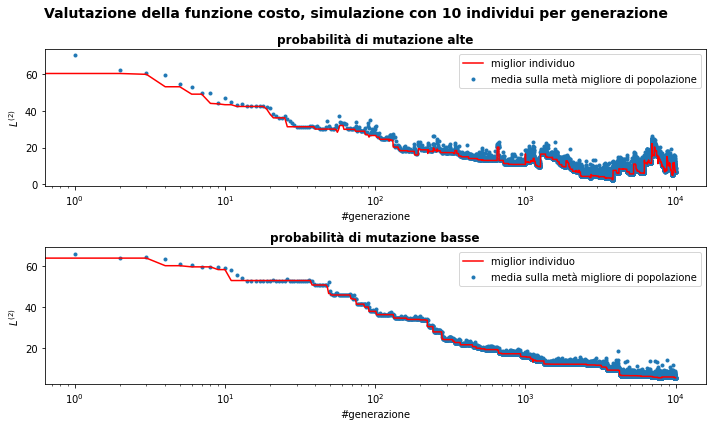

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

losses = np.genfromtxt('../09/TSPwithGA/circ_ng/losses.out', usecols=range(0,10), skip_header=1, unpack=True)
losses2 = np.genfromtxt('../09/TSPwithGA/circ_ng/losses2.out', usecols=range(0,10), skip_header=1, unpack=True)

ngen = np.arange(0,len(losses[0]), 1)
fig, axes = plt.subplots(2,1)
fig.set_size_inches(10,6)
fig.suptitle('Valutazione della funzione costo,'+
             ' simulazione con 10 individui per generazione',
            fontweight='bold', size=14)
axes[0].set_title('probabilità di mutazione alte', fontweight='bold')
axes[0].set_ylabel('$L^{(2)}$')
axes[0].set_xlabel('#generazione')
axes[0].set_xscale('log')
axes[0].plot(ngen, losses[0], color='red', label='miglior individuo')
axes[0].scatter(ngen, np.mean(losses, axis=0), marker='.', label='media sulla metà migliore di popolazione')

axes[1].set_title('probabilità di mutazione basse', fontweight='bold')
axes[1].set_ylabel('$L^{(2)}$')
axes[1].set_xlabel('#generazione')
axes[1].set_xscale('log')
axes[1].plot(ngen, losses2[0], color='red', label='miglior individuo')
axes[1].scatter(ngen, np.mean(losses2, axis=0), marker='.', label='media sulla metà migliore di popolazione')

axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()

Lo stesso effetto di riduzione della variabilità genetica al fine di preservare gli individui migliori può essere ottenuto attraverso un valore più alto di `q` che in queste simulazioni è stato posto pari a 5. Questi risultati non sono però soddisfacenti. Si nota infatti come fino alle ultime generazioni delle $10^4$ simulate si continui ad osservare l'abbassamento della funzione di costo. Questo indica una bassa velocità di convergenza alla soluzione. Inoltre se si analizza la soluzione trovata confrontandola con quella nei paragrafi successivi, risulta chiaramente non essere la migliore possibile.

Ho eseguito poi lo stesso test utilizzando 64 individui per generazione ed ottenendo i seguenti risultati

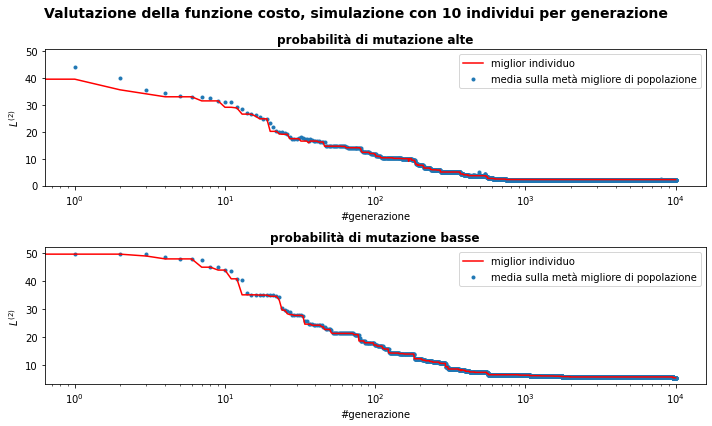

In [2]:
losses3 = np.genfromtxt('../09/TSPwithGA/circ_ng/losses3.out', usecols=range(0,10), skip_header=1, unpack=True)
losses4 = np.genfromtxt('../09/TSPwithGA/circ_ng/losses4.out', usecols=range(0,10), skip_header=1, unpack=True)

fig, axes = plt.subplots(2,1)
fig.set_size_inches(10,6)
fig.suptitle('Valutazione della funzione costo,'+
             ' simulazione con 10 individui per generazione',
            fontweight='bold', size=14)
axes[0].set_title('probabilità di mutazione alte', fontweight='bold')
axes[0].set_ylabel('$L^{(2)}$')
axes[0].set_xlabel('#generazione')
axes[0].set_xscale('log')
axes[0].plot(ngen, losses4[0], color='red', label='miglior individuo')
axes[0].scatter(ngen, np.mean(losses4, axis=0), marker='.', label='media sulla metà migliore di popolazione')

axes[1].set_title('probabilità di mutazione basse', fontweight='bold')
axes[1].set_ylabel('$L^{(2)}$')
axes[1].set_xlabel('#generazione')
axes[1].set_xscale('log')
axes[1].plot(ngen, losses3[0], color='red', label='miglior individuo')
axes[1].scatter(ngen, np.mean(losses3, axis=0), marker='.', label='media sulla metà migliore di popolazione')

axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()

se in particolare eseguiamo uno zoom sulle ultime generazioni

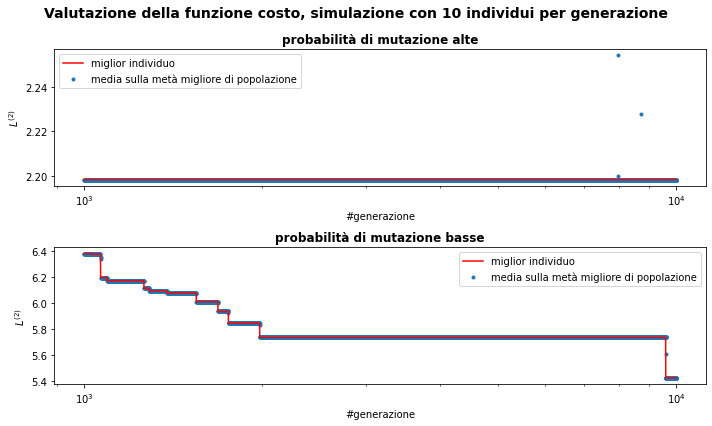

In [3]:
losses3 = np.genfromtxt('../09/TSPwithGA/circ_ng/losses3.out', usecols=range(0,10), skip_header=1, unpack=True)
losses4 = np.genfromtxt('../09/TSPwithGA/circ_ng/losses4.out', usecols=range(0,10), skip_header=1, unpack=True)

fig, axes = plt.subplots(2,1)
fig.set_size_inches(10,6)
fig.suptitle('Valutazione della funzione costo,'+
             ' simulazione con 10 individui per generazione',
            fontweight='bold', size=14)
axes[0].set_title('probabilità di mutazione alte', fontweight='bold')
axes[0].set_ylabel('$L^{(2)}$')
axes[0].set_xlabel('#generazione')
axes[0].set_xscale('log')
axes[0].plot(ngen[1000:10000], losses4[0][1000:10000], color='red', label='miglior individuo')
axes[0].scatter(ngen[1000:10000], np.mean(losses4, axis=0)[1000:10000], marker='.', label='media sulla metà migliore di popolazione')

axes[1].set_title('probabilità di mutazione basse', fontweight='bold')
axes[1].set_ylabel('$L^{(2)}$')
axes[1].set_xlabel('#generazione')
axes[1].set_xscale('log')
axes[1].plot(ngen[1000:10000], losses3[0][1000:10000], color='red', label='miglior individuo')
axes[1].scatter(ngen[1000:10000], np.mean(losses3, axis=0)[1000:10000], marker='.', label='media sulla metà migliore di popolazione')

axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()

si può osservare come nella simulazione eseguita con probabilità di mutazione alte fosse già stata raggiunta la soluzione migliore dopo sole 1000 generazioni. Nel secondo grafico si osserva invece come fino all'ultima generazione proseguano i miglioramenti pur raggiungendo alla fine un individuo meno peformante rispetto a quello trovato dalla simulazione caratterizzata da alte probabilità di mutazione.

Dallo studio di questi esperimenti ho concluso che è meglio utilizzare un valore alto (64) di individui per generazione, con alte probabilità di mutazione. Risultano inoltre sufficienti 1000 generazioni.

Ho eseguito prove analoghe variando gli stessi parametri e altri, come ad esempio `q`, estrapolando come ideale la seguente configurazione:

- numero di generazioni = 1000
- numero di individui per generazione = 64
- probabilità di crossover = 0.5
- probabilità con cui far avvenire ciascuna mutazione = 0.1
- indice q utilizzato dall'operatore di selezione = 5

È interessante però notare come parzialmente questa scelta dei parametri sia dipendente dal problema. Nel caso della disposizione delle città all'interno del quadrato alcuni tentativi con parametri differenti hanno rivelato la presenza di una soluzione migliore. Per risolvere questo secondo problema ho quindi innalzato a 128 il numero di individui per generazione, è inoltre risultato più favorevole abbassare il valore di `q` a 3. 

Infine si osserva che simulazioni che in totale generano lo stesso numero di individui dato da
$$
 \text{numero generazioni x individui per generazione}
$$
non forniscono in generale gli stessi risultati se i due valori singolarmente sono tra loro diversi.

Ho eseguito anche dei test modificando il seme di partenza del generatore di numeri casuali in modo da controllare di non aver fatto scelte dipendenti dalla particolare sequenza di numeri pseudocasuali. In questo caso è necessario ricordare che anche il problema generato sarà diverso.

## 7 Risultati 

Come già accennato ho risolto due differenti problemi del commesso viaggiatore:
1. 32 città disposte casualmente sulla circonferenza unitaria
2. 32 città disposte casualmente all'interno del quadrato [0, 1)x[0;1).

Entrambi i problemi sono bidimensionali, ciascuna città sarà quindi caratterizzata da due coordinate. Nel primo caso la soluzione è intuitiva: le città devono essere esplorate nell'ordine con cui appaiono sulla circonferenza. Questo mi permette di capire se l'algoritmo realizzato sta funzionando correttamente.

Per le simulazioni ho utilizzato le configurazioni sopra discusse.

### 7.1 Mappa con 32 città sulla circonferenza unitaria

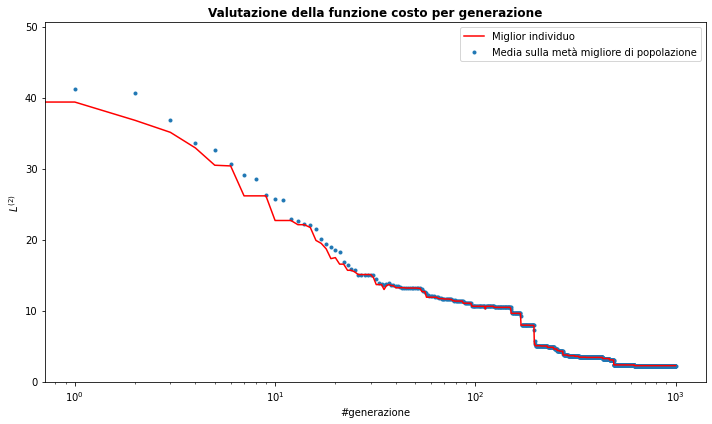

In [4]:
losses = np.genfromtxt('../09/TSPwithGA/circ_best/losses.out', usecols=range(0,10), skip_header=1, unpack=True)

ngen = np.arange(0,len(losses[0]), 1)
fig, axes = plt.subplots(1)
fig.set_size_inches(10,6)

axes.set_title('Valutazione della funzione costo per generazione', fontweight='bold')
axes.set_ylabel('$L^{(2)}$')
axes.set_xlabel('#generazione')
axes.set_xscale('log')
axes.plot(ngen, losses[0], color='red', label='Miglior individuo')

axes.scatter(ngen, np.mean(losses, axis=0), marker='.', label='Media sulla metà migliore di popolazione')

plt.legend()
plt.tight_layout()
plt.show()

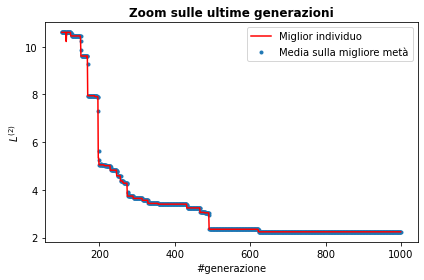

In [5]:
plt.title('Zoom sulle ultime generazioni', fontweight='bold')
plt.ylabel('$L^{(2)}$')
plt.xlabel('#generazione')
plt.plot(ngen[100:1000], losses[0][100:1000],  label='Miglior individuo', color='red')
plt.scatter(ngen[100:1000], np.mean(losses, axis=0)[100:1000], marker='.', label='Media sulla migliore metà')


plt.legend()
plt.tight_layout()
plt.show()

Nei grafici precedenti si può osservare come è variato nel corso dell'evoluzione il valore della funzione di costo valutata sui migliori individui e mediata sulla metà migliore della popolazione. 

Si osservi prima di tutto l'andamento che presenta, in entrambi i casi, una rapida diminuzione nel corso delle prime generazioni mentre nelle ultime le soluzioni con un costo già basso sopravvivono per un numero maggiore di generazioni prima di essere superate da individui migliori.

Un altro aspetto interessante da osservare è la variabilità genetica. Questa è visibile nella differenza, in particolare nel grafico focalizzato sulle ultime generazioni, tra il costo del miglior individuo e la media della metà migliore della popolazione. Il saltuario aumento di quest'ultima indica la nascita nelle rispettive generazioni di individui con costi molto alti e quindi diversi da quelli migliori. Si suppone quindi che analogamente ne nascano di diversi dai migliori ma caratterizzati da una migliore performance. Questa variabilità permette una più ampia esplorazione dello spazio delle soluzioni.

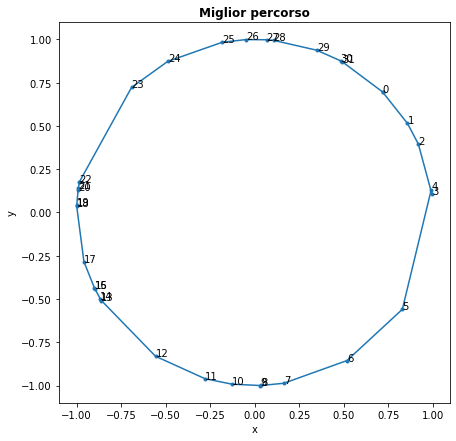

Valore della funzione di costo valutata su questa soluzione: 2.2


In [6]:
fig, axe = plt.subplots(1,1)
axe.set_title('Miglior percorso', fontweight='bold')
fig.set_size_inches(7,7)
x, y = np.genfromtxt('../09/TSPwithGA/circ_best/best_path.out', usecols=(0,1), skip_header=1, unpack=True)
axe.plot(x,y, marker='.')
axe.set_xlabel('x')
axe.set_ylabel('y')
for i in range(0,len(x)-1):
    axe.annotate(i, (x[i], y[i]))

lossf = open('../09/TSPwithGA/circ_best/best_path.out', 'r')
loss = float(lossf.readline().split(':')[1])
plt.show()
print('Valore della funzione di costo valutata su questa soluzione: {:.2}'.format(loss))

In quest'ultimo grafico è presente una ricostruzione grafica delle varie città e del percorso che il programma realizzato ha individuato come migliore.

### 7.2 Mappa con 32 città all'interno di un quadrato

Per la configurazione in cui le città sono state estratte casualmente all'interno del quadrato i risultati ottenuti, utilizzando gli stessi iperparametri, sono i seguenti

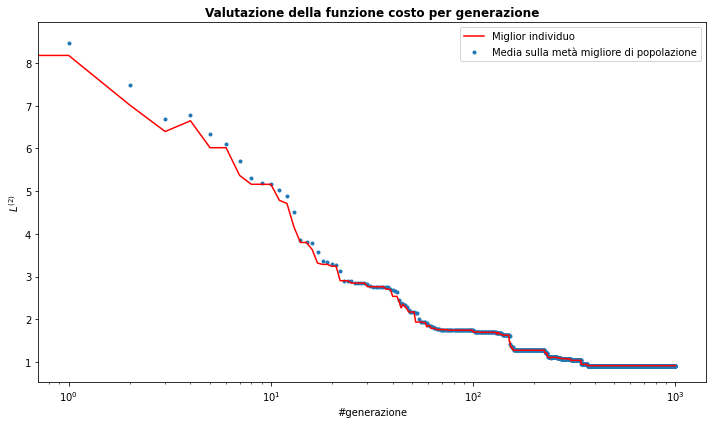

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

losses = np.genfromtxt('../09/TSPwithGA/quad_best/losses.out', usecols=range(0,10), skip_header=1, unpack=True)

ngen = np.arange(0,len(losses[0]), 1)
fig, axes = plt.subplots(1)
fig.set_size_inches(10,6)

axes.set_title('Valutazione della funzione costo per generazione', fontweight='bold')
axes.set_ylabel('$L^{(2)}$')
axes.set_xlabel('#generazione')
axes.set_xscale('log')
axes.plot(ngen, losses[0], color='red', label='Miglior individuo')

axes.scatter(ngen, np.mean(losses, axis=0), marker='.', label='Media sulla metà migliore di popolazione')

plt.legend()
plt.tight_layout()
plt.show()

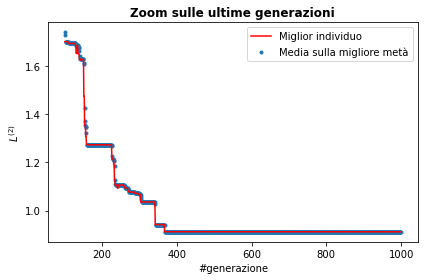

In [8]:
plt.title('Zoom sulle ultime generazioni', fontweight='bold')
#figure(figsize=(5,5))
plt.ylabel('$L^{(2)}$')
plt.xlabel('#generazione')
plt.plot(ngen[100:1000], losses[0][100:1000],  label='Miglior individuo', color='red')
plt.scatter(ngen[100:1000], np.mean(losses, axis=0)[100:1000], marker='.', label='Media sulla migliore metà')


plt.legend()
plt.tight_layout()
plt.show()

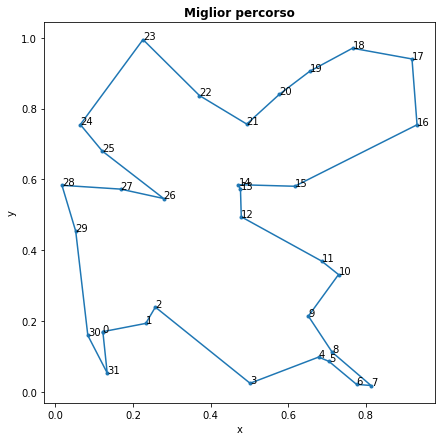

Funzione di costo valutata su questa soluzione: 0.91


In [9]:
fig, axe = plt.subplots(1,1)
axe.set_title('Miglior percorso', fontweight='bold')
fig.set_size_inches(7,7)
x, y = np.genfromtxt('../09/TSPwithGA/quad_best/best_path.out', usecols=(0,1), skip_header=1, unpack=True)
axe.plot(x,y, marker='.')
axe.set_xlabel('x')
axe.set_ylabel('y')
for i in range(0,len(x)-1):
    axe.annotate(i, (x[i], y[i]))

lossf = open('../09/TSPwithGA/quad_best/best_path.out', 'r')
loss = float(lossf.readline().split(':')[1])
plt.show()
print('Funzione di costo valutata su questa soluzione: {:.2}'.format(loss))

## 8 Conclusione

In questa esercitazione ho implementato con successo un algoritmo genetico per la risoluzione del problema del commesso viaggiatore. Ho apprezzato la libertà di scelte che è possibile compiere sia nell'implementazione sia nella regolazione degli iperparametri e ho valutato come queste influiscano sui risultati che si possono ottenere. 
In queste applicazioni sono state predilette scelte che minimizzassero il numero di generazioni e il tempo di esecuzione, a scapito della possibilità di generalizzarle nell'applicazione a problemi diversi. Questo approcio richiede, al passaggio ad un nuovo problema, di effettuare nuovamente alcuni tentativi di regolazione degli iperparametri per ricercare la configurazione più efficiente. 
Avrei potuto anche utilizzare un approcio diverso scegliendo configurazioni più robuste e generalizzabili ma caratterizzate da un maggiore costo computazionale in termini di tempo e risorse.